## DAEN690-OuterJoins

The purpose of this notebook is to identify orphan records in the Procedures and Medications datasets that are not contained in the Patients dataset. This will be done leveraging the Pandas and NumPy Python libraries by performing left outer joins (actually, merge in Pandas) on the table keys on the left side compared to the same on the right side where the value is NULL.

* You can run the notebook document step-by-step (one cell a time) by pressing shift + enter.

* You can run the whole notebook in a single step by clicking on the menu Cell -> Run All.

In [1]:
# Import libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from matplotlib_venn import venn2, venn2_circles
# You may not have this library, so to get you must open a conda cmd window from 
# Anaconda Navigator and run at the command line> pip install matplotlib-venn

Use Pandas to read partner dataset(s) provided in Excel workbook into a dataframe by spreadsheet name, transforming and Not a Number (NaN) values into text “NA”, and only importing the PatientId and FRDPersonnelID columns. 

In [2]:
df_pat = pd.read_excel(r'DAEN690-2wDates.xlsx', 
                       sheet_name='Patients', 
                       na_values=['NA'], 
                       usecols = 'A,B')

In [3]:
df_pat.head(5)

,PatientId,FRDPersonnelID
0,479838,6ED7C99E-9E01-E211-B5F5-78E7D18CFD3C
1,479838,F39A55F0-C619-E511-80CA-001DD8B71D38
2,479838,D6D3C99E-9E01-E211-B5F5-78E7D18CFD3C
3,479839,71D4C99E-9E01-E211-B5F5-78E7D18CFD3C
4,479839,F9D4C99E-9E01-E211-B5F5-78E7D18CFD3C


In [4]:
# get accurate row count for Venn Diagram later
varPatCount = len(df_pat.index)
# Display dataframe shape
df_pat.shape

(545060, 2)

Create a concatenated column based on the key values of PatientId and FRDPersonnelID for the Patients dataset. Purposefully named the new column "_IDs" in the Patients dataset to differentiate from what they will be named in the other datasets.

In [5]:
df_pat['_IDs'] = df_pat['PatientId'].map(str) + '|' + df_pat['FRDPersonnelID']

In [6]:
df_pat.head(5)

,PatientId,FRDPersonnelID,_IDs
0,479838,6ED7C99E-9E01-E211-B5F5-78E7D18CFD3C,479838|6ED7C99E-9E01-E211-B5F5-78E7D18CFD3C
1,479838,F39A55F0-C619-E511-80CA-001DD8B71D38,479838|F39A55F0-C619-E511-80CA-001DD8B71D38
2,479838,D6D3C99E-9E01-E211-B5F5-78E7D18CFD3C,479838|D6D3C99E-9E01-E211-B5F5-78E7D18CFD3C
3,479839,71D4C99E-9E01-E211-B5F5-78E7D18CFD3C,479839|71D4C99E-9E01-E211-B5F5-78E7D18CFD3C
4,479839,F9D4C99E-9E01-E211-B5F5-78E7D18CFD3C,479839|F9D4C99E-9E01-E211-B5F5-78E7D18CFD3C


In [7]:
# run this for a single specific row
df_pat.loc[df_pat['PatientId'] == 479920]

,PatientId,FRDPersonnelID,_IDs
46,479920,A0A16D01-B819-E511-80CA-001DD8B71D38,479920|A0A16D01-B819-E511-80CA-001DD8B71D38
47,479920,995B70E4-8D50-E311-B3F8-AE437D699481,479920|995B70E4-8D50-E311-B3F8-AE437D699481


Read in Medications dataset into dataframe transforming and Not a Number (NaN) values into text "NA", and only importing the PatientId and FRDPersonnelID columns. 

In [8]:
df_med = pd.read_excel(r'DAEN690-2wDates.xlsx', 
                       sheet_name='Medications', 
                       na_values=['NA'], 
                       usecols = 'A,D')

In [9]:
df_med.head(5)

,PatientId,FRDPersonnelID
0,480158,05CD4840-EB36-4EC3-9292-74904CFBD0C4
1,480158,05CD4840-EB36-4EC3-9292-74904CFBD0C4
2,480158,05CD4840-EB36-4EC3-9292-74904CFBD0C4
3,480158,05CD4840-EB36-4EC3-9292-74904CFBD0C4
4,480399,41D6C99E-9E01-E211-B5F5-78E7D18CFD3C


In [10]:
# get accurate row count for Venn Diagram later
varMedCount = len(df_med.index)
# Display dataframe shape
df_med.shape

(63311, 2)

Create a concatenated column based on the key values of PatientId and FRDPersonnelID for the Medications dataset. The new column is named "IDs" in this case and will be used in the left outer joins.

In [11]:
df_med['IDs'] = df_med['PatientId'].map(str) + '|' + df_med['FRDPersonnelID']

In [12]:
df_med.head(5)

,PatientId,FRDPersonnelID,IDs
0,480158,05CD4840-EB36-4EC3-9292-74904CFBD0C4,480158|05CD4840-EB36-4EC3-9292-74904CFBD0C4
1,480158,05CD4840-EB36-4EC3-9292-74904CFBD0C4,480158|05CD4840-EB36-4EC3-9292-74904CFBD0C4
2,480158,05CD4840-EB36-4EC3-9292-74904CFBD0C4,480158|05CD4840-EB36-4EC3-9292-74904CFBD0C4
3,480158,05CD4840-EB36-4EC3-9292-74904CFBD0C4,480158|05CD4840-EB36-4EC3-9292-74904CFBD0C4
4,480399,41D6C99E-9E01-E211-B5F5-78E7D18CFD3C,480399|41D6C99E-9E01-E211-B5F5-78E7D18CFD3C


In [13]:
# run this for a single specific row
df_med.loc[df_med['PatientId'] == 479920]

,PatientId,FRDPersonnelID,IDs
68,479920,C387923A-F613-E411-A585-F305C4522FCB,479920|C387923A-F613-E411-A585-F305C4522FCB


For the next part, set indexes to use for both the Medications and Patients datasets (IDs and _IDs). Then perform a left outer join from the Medications side against Patients where Patients rows are NULL. This done differently than SQL in that it uses the Pandas merge() function then uses Dataset_x and _y, it sets an indicator “i”, and finally displays rows where a “left_only” indicator is seen.

In [14]:
medIDi = df_med.set_index('IDs')
patIDi = df_pat.set_index('_IDs')

df_left_outer_med = df_med.merge(patIDi, 
                             how = 'left', 
                             left_on = 'IDs', 
                             right_on = '_IDs', 
                             indicator = 'i').query('i == "left_only"')

# To view detailed detailed results, include the following statement to output csv to home dir.
# df_left_outer_med.to_csv('dfLeftOuter-Med.csv', index = True)

In [15]:
df_left_outer_med.head(5)

,PatientId_x,FRDPersonnelID_x,IDs,PatientId_y,FRDPersonnelID_y,i
68,479920,C387923A-F613-E411-A585-F305C4522FCB,479920|C387923A-F613-E411-A585-F305C4522FCB,NaN,NaN,left_only
72,480751,38D8C99E-9E01-E211-B5F5-78E7D18CFD3C,480751|38D8C99E-9E01-E211-B5F5-78E7D18CFD3C,NaN,NaN,left_only
129,493185,38D5C99E-9E01-E211-B5F5-78E7D18CFD3C,493185|38D5C99E-9E01-E211-B5F5-78E7D18CFD3C,NaN,NaN,left_only
150,482778,BFFA1ECF-CE19-E511-80CA-001DD8B71D38,482778|BFFA1ECF-CE19-E511-80CA-001DD8B71D38,NaN,NaN,left_only
179,488832,5ADFD4DD-39A0-47CF-AE61-A9F6AABF342F,488832|5ADFD4DD-39A0-47CF-AE61-A9F6AABF342F,NaN,NaN,left_only


In [16]:
# run this for a single specific row
df_left_outer_med.loc[df_left_outer_med['PatientId_x'] == 479920]

,PatientId_x,FRDPersonnelID_x,IDs,PatientId_y,FRDPersonnelID_y,i
68,479920,C387923A-F613-E411-A585-F305C4522FCB,479920|C387923A-F613-E411-A585-F305C4522FCB,NaN,NaN,left_only


In [17]:
# get accurate row count for Venn Diagram later
varMedLeftCount = len(df_left_outer_med.index)
varMedDiffCount = varMedCount - varMedLeftCount
varPatDiffCount = varPatCount - varMedDiffCount
# Will show row count of Medications rows not in Patients
df_left_outer_med.shape

(4219, 6)

In [18]:
# Deduplicate IDs to get a unique count of IDs in Medications that are not in Patients.
df_med_dedupe = df_left_outer_med.drop_duplicates(subset=['IDs'])

In [19]:
# For curiosity, this will show row count of deduplicated rows in Medications that are not in Patients.
df_med_dedupe.shape

(2932, 6)

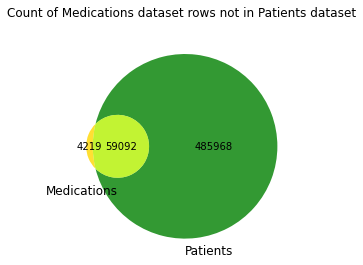

In [20]:
#venn2(subsets = (varMedLeftCount, varMedDiffCount, varPatCount),
venn2(subsets = (varMedLeftCount, varPatDiffCount, varMedDiffCount),
      set_labels = ('Medications', 'Patients'), 
      set_colors = ('gold', 'green'), #('r', 'g'), 
      alpha = 0.8);

#venn2_circles(subsets = (varMedLeftCount, varPatDiffCount, varMedDiffCount), 
#              #linestyle='dashed', 
#              linewidth=1, 
#              color='k');

plt.title('Count of Medications dataset rows not in Patients dataset\n');

Read in Procedures dataset into dataframe transforming and Not a Number (NaN) values into text "NA", and only importing the PatientId and FRDPersonnelID columns.

In [21]:
df_proc = pd.read_excel(r'DAEN690-2wDates.xlsx', 
                        sheet_name='Procedures', 
                        na_values=['NA'], 
                        usecols = 'A,D')

In [22]:
df_proc.head(5)

,PatientId,FRDPersonnelID
0,481435,44D6C99E-9E01-E211-B5F5-78E7D18CFD3C
1,481435,44D6C99E-9E01-E211-B5F5-78E7D18CFD3C
2,481435,44D6C99E-9E01-E211-B5F5-78E7D18CFD3C
3,481491,882609CE-C6DB-49DA-92A5-5519ECD5BFF4
4,481501,78C0656B-4FD3-4AFD-8907-05258241F20A


In [23]:
# get accurate row count for Venn Diagram later
varProcCount = len(df_proc.index)
# Display dataframe shape
df_proc.shape

(171515, 2)

Create a concatenated column based on the key values of PatientId and FRDPersonnelID for the Procedures dataset. The new column is named "IDs" in this case and will be used in the left outer joins.

In [24]:
df_proc['IDs'] = df_proc['PatientId'].map(str) + '|' + df_proc['FRDPersonnelID']

In [25]:
df_proc.head(5)

,PatientId,FRDPersonnelID,IDs
0,481435,44D6C99E-9E01-E211-B5F5-78E7D18CFD3C,481435|44D6C99E-9E01-E211-B5F5-78E7D18CFD3C
1,481435,44D6C99E-9E01-E211-B5F5-78E7D18CFD3C,481435|44D6C99E-9E01-E211-B5F5-78E7D18CFD3C
2,481435,44D6C99E-9E01-E211-B5F5-78E7D18CFD3C,481435|44D6C99E-9E01-E211-B5F5-78E7D18CFD3C
3,481491,882609CE-C6DB-49DA-92A5-5519ECD5BFF4,481491|882609CE-C6DB-49DA-92A5-5519ECD5BFF4
4,481501,78C0656B-4FD3-4AFD-8907-05258241F20A,481501|78C0656B-4FD3-4AFD-8907-05258241F20A


In [26]:
# run this for a single specific row
df_proc.loc[df_proc['PatientId'] == 479920]

,PatientId,FRDPersonnelID,IDs
954,479920,C387923A-F613-E411-A585-F305C4522FCB,479920|C387923A-F613-E411-A585-F305C4522FCB


Set indexes to use for both the Procedures and Patients datasets (IDs and _IDs). Then perform a left outer join from the Procedures side against Patients where Patients rows are NULL. This done differently than SQL in that it uses the Pandas merge() function then uses Dataset_x and _y, it sets an indicator “i”, and finally displays rows where a “left_only” indicator is seen. It’s not necessary to reassign patIDi because this was done in earlier code. 

In [27]:
procIDi = df_proc.set_index('IDs')

df_left_outer_proc = df_proc.merge(patIDi, 
                             how = 'left', 
                             left_on = 'IDs', 
                             right_on = '_IDs', 
                             indicator = 'i').query('i == "left_only"')

# To view detailed detailed results, include the following statement to output csv to home dir.
#df_left_outer_proc.to_csv('dfLeftOuter-Proc.csv', index = True)

In [28]:
df_left_outer_proc.head(5)

,PatientId_x,FRDPersonnelID_x,IDs,PatientId_y,FRDPersonnelID_y,i
4,481501,78C0656B-4FD3-4AFD-8907-05258241F20A,481501|78C0656B-4FD3-4AFD-8907-05258241F20A,NaN,NaN,left_only
6,481501,78C0656B-4FD3-4AFD-8907-05258241F20A,481501|78C0656B-4FD3-4AFD-8907-05258241F20A,NaN,NaN,left_only
12,481771,2DD5C99E-9E01-E211-B5F5-78E7D18CFD3C,481771|2DD5C99E-9E01-E211-B5F5-78E7D18CFD3C,NaN,NaN,left_only
34,480980,55D2C99E-9E01-E211-B5F5-78E7D18CFD3C,480980|55D2C99E-9E01-E211-B5F5-78E7D18CFD3C,NaN,NaN,left_only
46,485829,44D6C99E-9E01-E211-B5F5-78E7D18CFD3C,485829|44D6C99E-9E01-E211-B5F5-78E7D18CFD3C,NaN,NaN,left_only


In [29]:
# run this for a single specific row
df_left_outer_proc.loc[df_left_outer_proc['PatientId_x'] == 479920]

,PatientId_x,FRDPersonnelID_x,IDs,PatientId_y,FRDPersonnelID_y,i
954,479920,C387923A-F613-E411-A585-F305C4522FCB,479920|C387923A-F613-E411-A585-F305C4522FCB,NaN,NaN,left_only


In [30]:
# get accurate row count for Venn Diagram later
varProcLeftCount = len(df_left_outer_proc.index)
varProcDiffCount = varProcCount - varProcLeftCount
varPatDiffCount = varPatCount - varProcDiffCount
# Will show row count of Procedures rows not in Patients
df_left_outer_proc.shape

(22956, 6)

In [31]:
# Deduplicate IDs to get a unique count of IDs in Procedures that are not in Patients.
df_proc_dedupe = df_left_outer_proc.drop_duplicates(subset=['IDs'])

In [32]:
# For curiosity, this will show row count of deduplicated rows in Procedures that are not in Patients.
df_proc_dedupe.shape

(19989, 6)

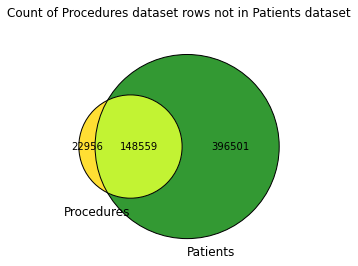

In [33]:
#venn2(subsets = (varMedLeftCount, varMedDiffCount, varPatCount),
venn2(subsets = (varProcLeftCount, varPatDiffCount, varProcDiffCount),
      set_labels = ('Procedures', 'Patients'), 
      set_colors = ('gold', 'green'), 
      alpha = 0.8);

venn2_circles(subsets = (varProcLeftCount, varPatDiffCount, varProcDiffCount), 
              #linestyle='dashed', 
              linewidth=1, 
              color='k');

plt.title('Count of Procedures dataset rows not in Patients dataset\n');